
**Library**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
file_data = 'Lab8-pima.csv'

**Attributes**
- **Pregnancies** : Number of times pregnant
- **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure** : Diastolic blood pressure (mm Hg)
- **SkinThickness** : Triceps skin fold thickness (mm)
- **Insulin** : 2-Hour serum insulin (mu U/ml)
- **BMI** : Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction** : Diabetes pedigree function
- **Age** : Age (years)
- **Outcome** : Class variable (0 or 1)

In [4]:
attributes = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [5]:
df = pd.read_csv(file_data, names=attributes)

**1. Đọc dữ liệu và hiển thị ra 20 mẫu đầu tiên**

In [6]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**2. Cho biết Kích thước dữ liệu**

In [7]:
df.shape

(768, 9)

**3. Cho biết Kiểu dữ liệu**

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**4. Cho biết số lượng mỗi lớp có trong dữ liệu**

In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

**5. Thực hiện các thống kê cơ bản về các trường trong bộ dữ liệu**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**6. Trực quan hóa dữ liệu với các biểu đồ grid line, box, histogram, và scatter matrix**

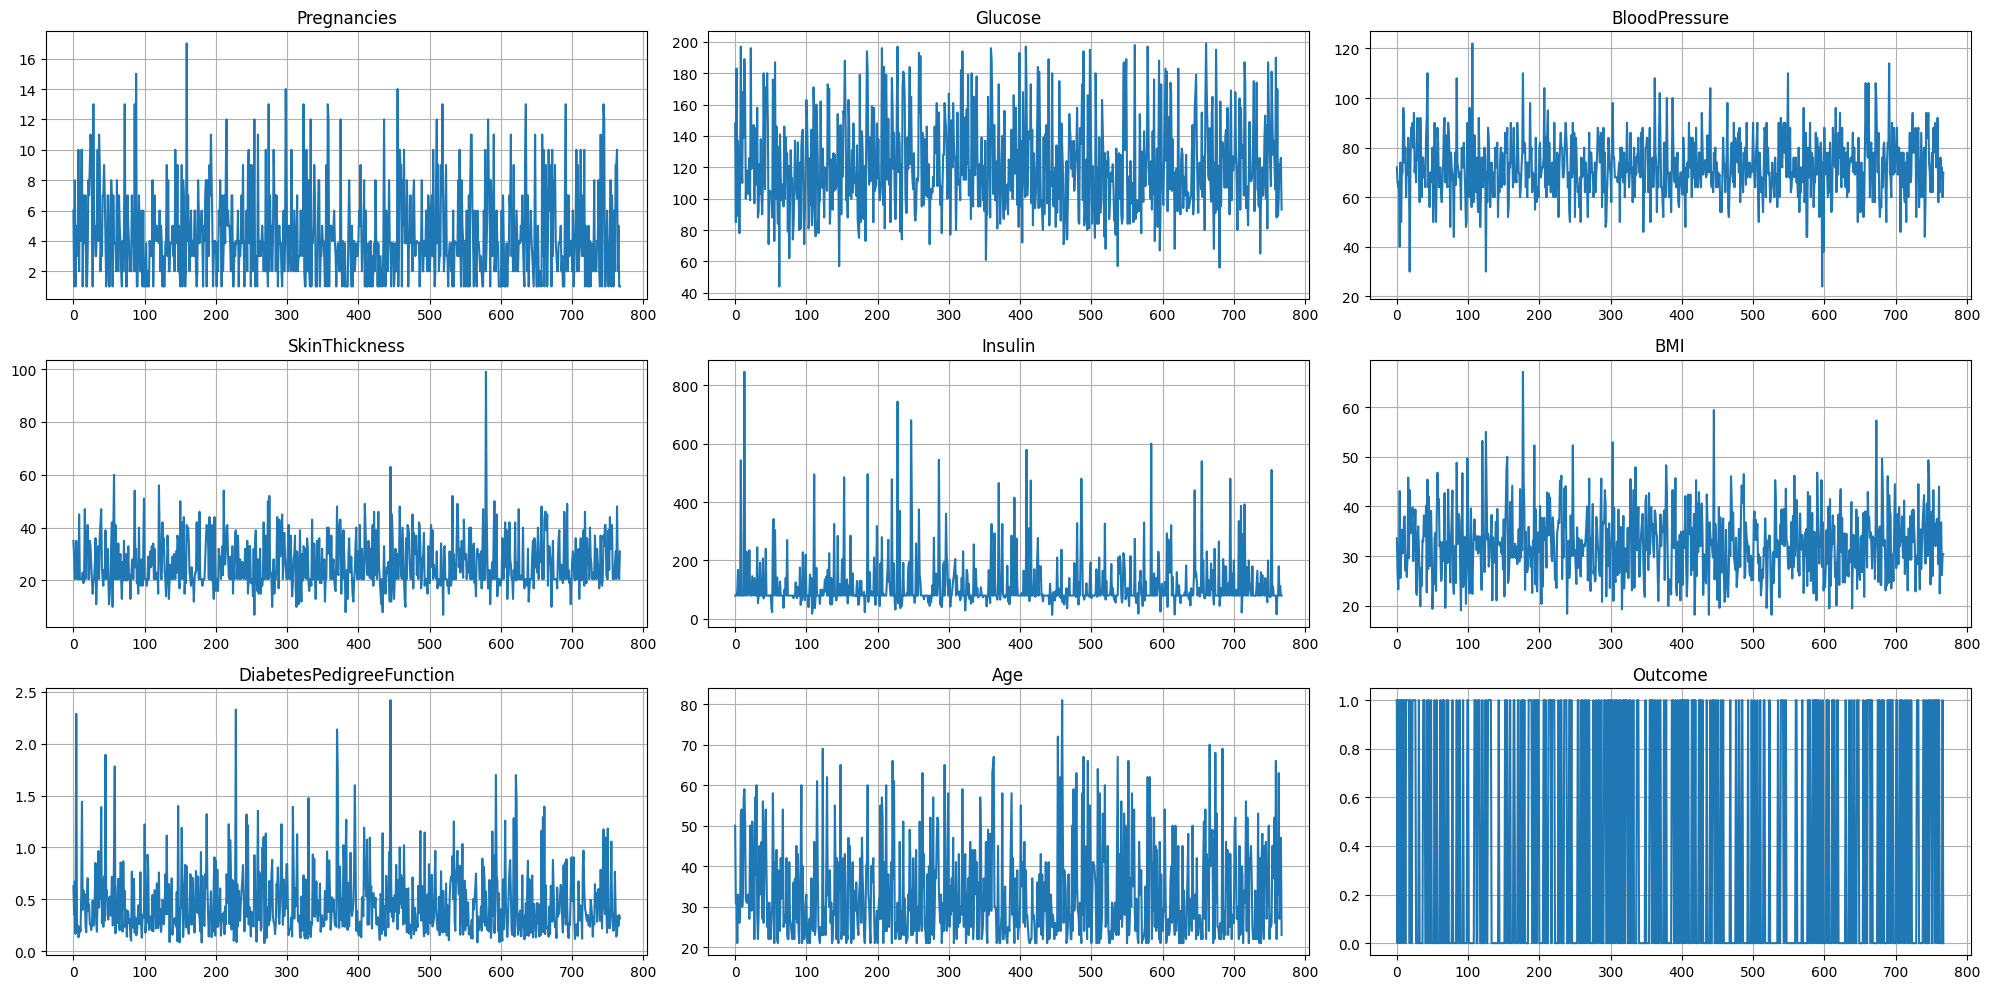

In [45]:
# Biểu đồ grid line

plt.figure(figsize=(20,10))
cnt = 1
for _ in df.columns :
    plt.subplot(3,3,cnt)
    plt.title(_)
    plt.plot(df[_])
    plt.tight_layout()
    plt.grid()
    cnt += 1
plt.show()

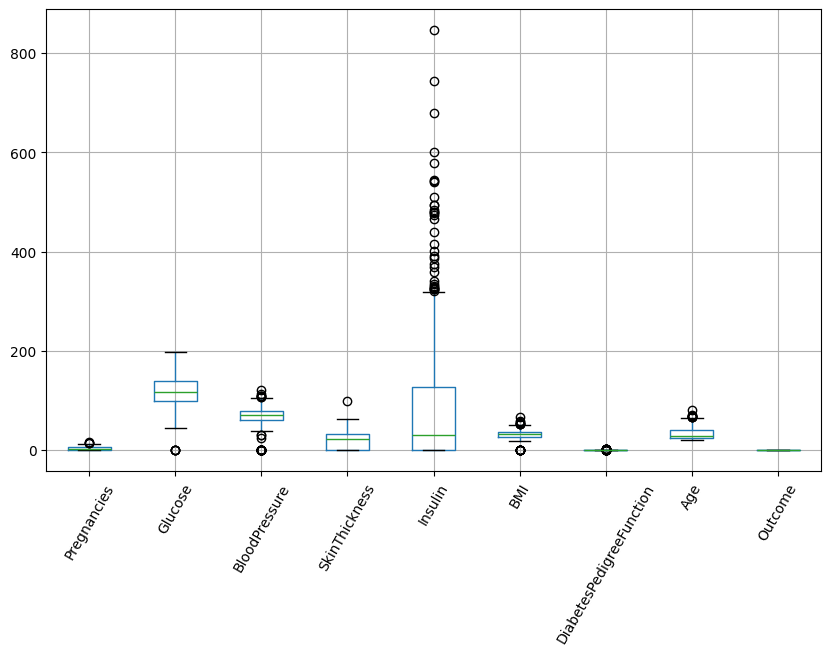

In [12]:
# Biểu đồ box 
plt.figure(figsize=(10,6))

df.boxplot()
plt.gca().set_xticklabels(df.columns, rotation=60)
plt.show()

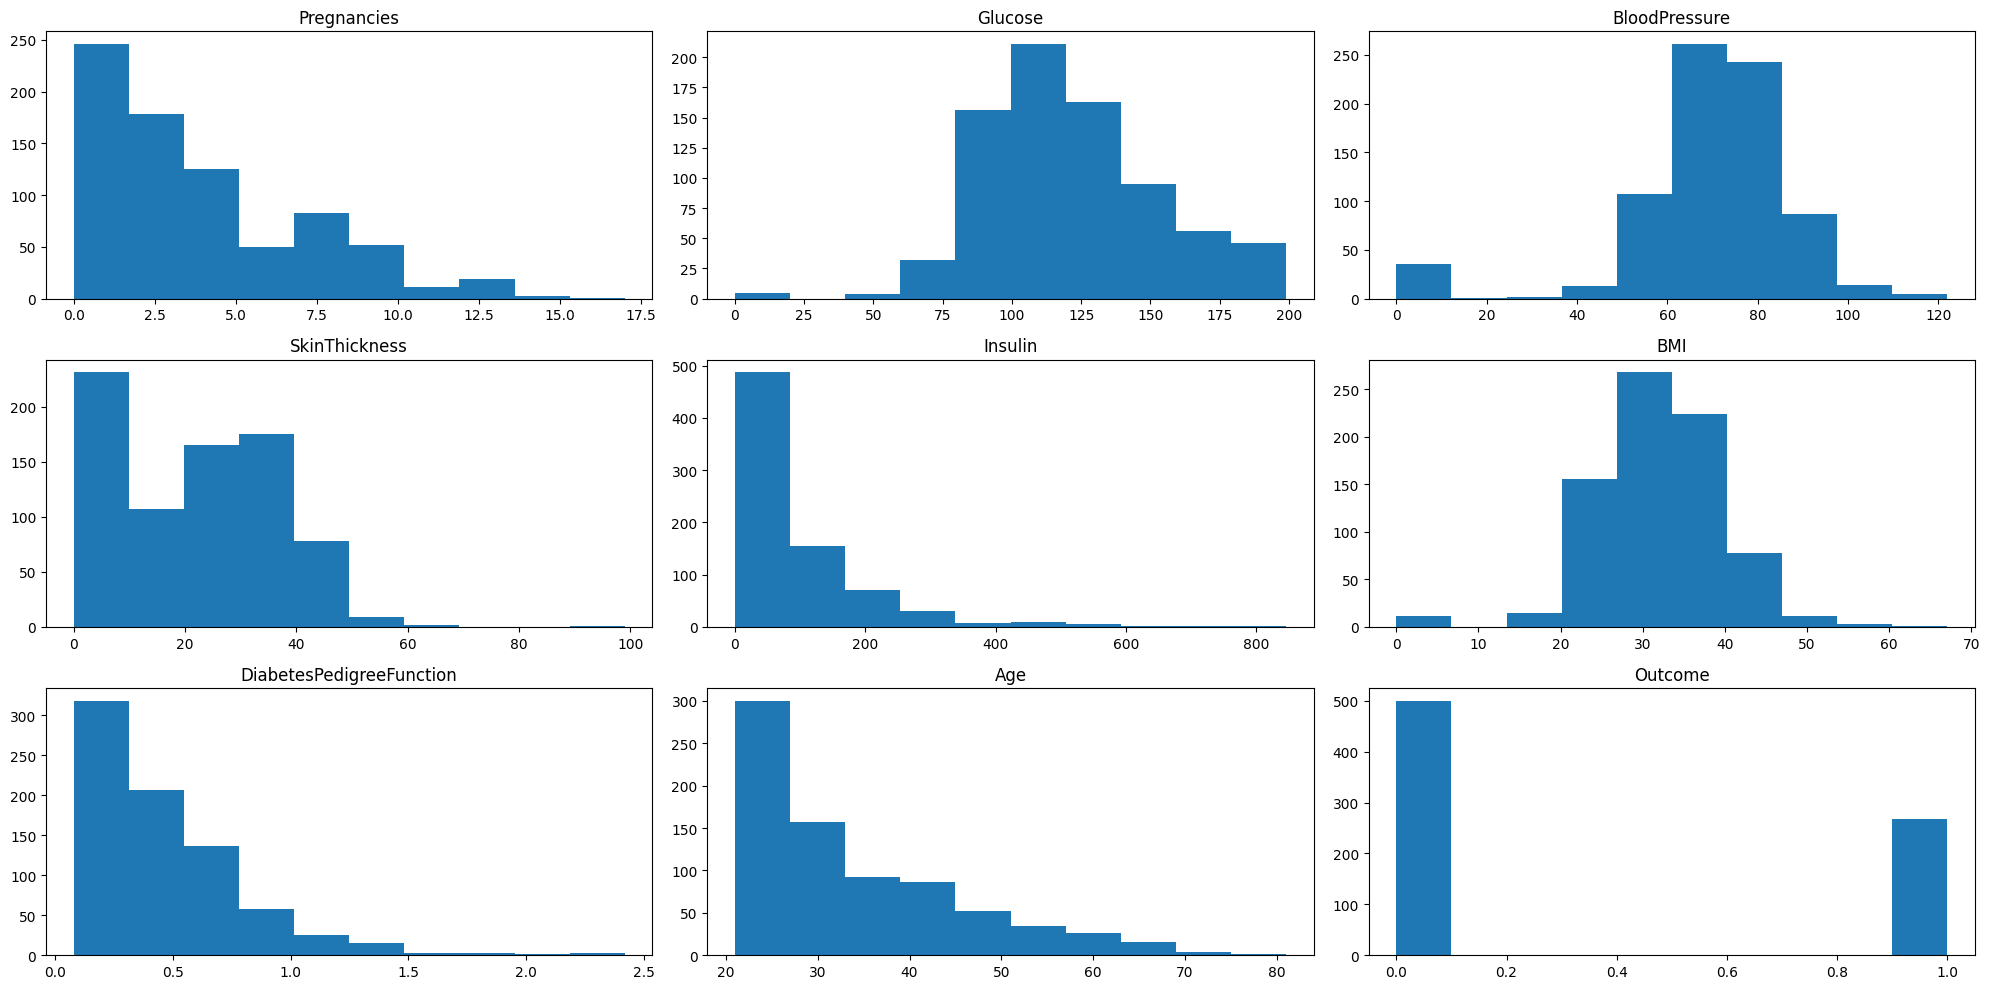

In [13]:
# Biểu dồ histogram
plt.figure(figsize=(20,10))
cnt = 1
for _ in df.columns:
    plt.subplot(3,3,cnt)
    plt.title(_)
    plt.hist(df[_])
    plt.tight_layout()
    cnt += 1
plt.show()

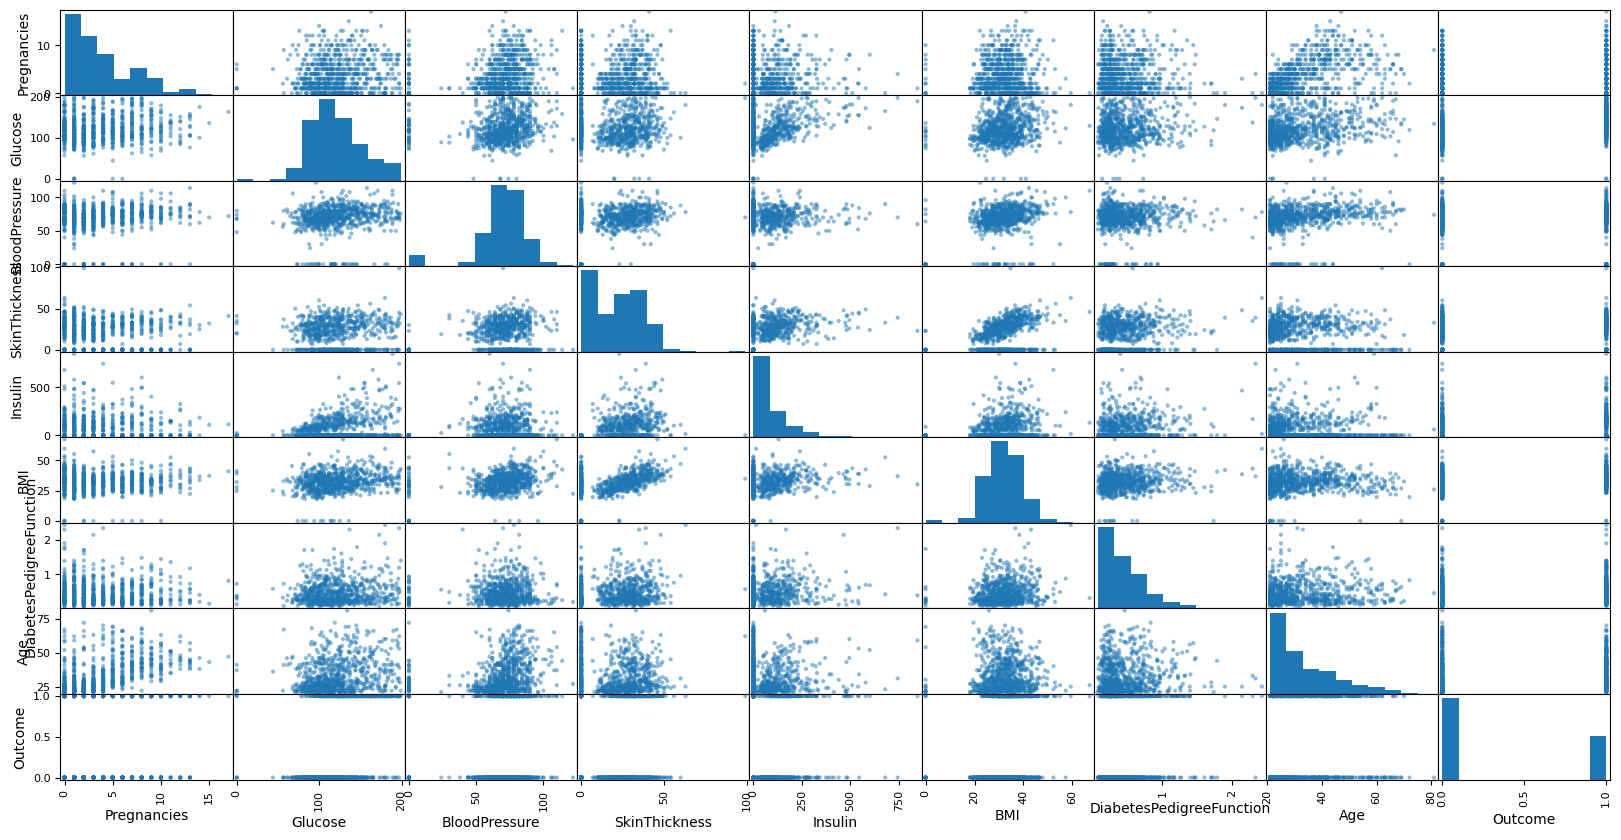

In [14]:
# Biểu đồ scatter matrix
pd.plotting.scatter_matrix(df, figsize=[20,10])
plt.show()

**7. Tính mối tương quan Pearson cho từng cặp thuộc tính và trực quan hóa kết quả**

In [15]:
pearson = df.corr()
pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

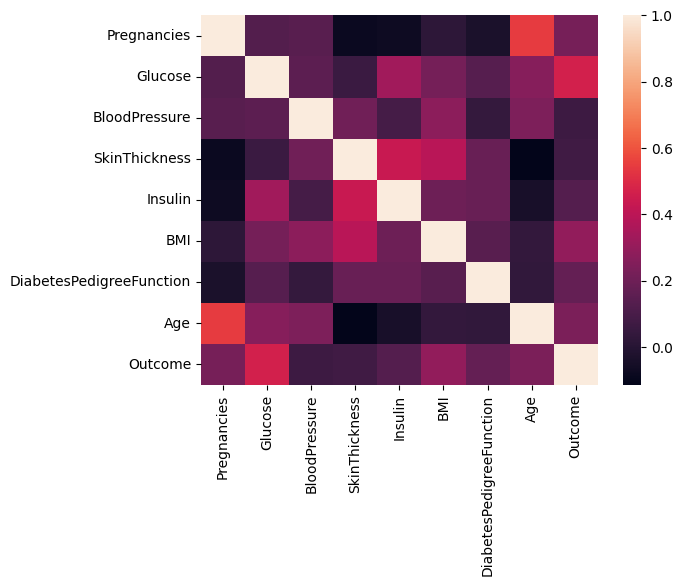

In [16]:
sns.heatmap(pearson)

**8. Tính mối tương quan Spearman cho từng cặp thuộc tính và trực quan hóa kết quả**


In [17]:
spearman = df.corr(method='spearman')
spearman

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucose,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
BloodPressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
SkinThickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
BMI,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Outcome,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


<Axes: >

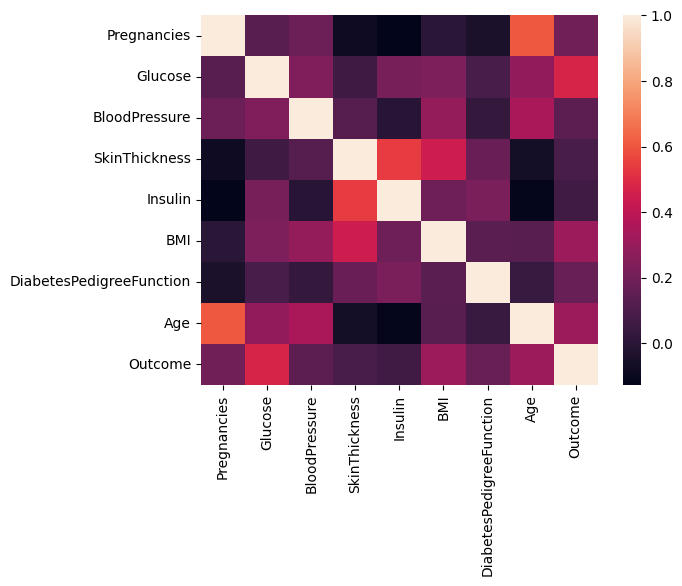

In [18]:
sns.heatmap(spearman)

**9. Tính Độ lệch (skewness) cho mỗi thuộc tính**

In [19]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

**10. Hãy sửa những dữ liệu có giá trị bằng 0 là dữ liệu thiếu (NaN)**

In [20]:
df.replace(0,np.nan, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


**11. Đếm số lượng giá trị NaN trên mỗi thuộc tính**

In [21]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**12. Thay thế giá trị còn thiếu bằng giá trị trung bình của mỗi thuộc tính và lưu vào 1 file**

In [22]:
df.replace(np.nan,0,inplace=True)

In [23]:
temp = df['Outcome'].copy()
df.replace(0,df.mean(), inplace=True)
df['Outcome'] = temp
df.to_csv('new_pima.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1.0


In [24]:
data = pd.read_csv('new_pima.csv')
data = data.drop('Unnamed: 0', axis=1)
target = data['Outcome']
features = data.drop('Outcome', axis=1)

**13. Chia dữ liệu ở 12 thành 2 bộ Train/Test với tỷ lệ 8/2 và 7/3**

In [25]:
# 8 : 2
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(features,target,test_size=0.2, random_state=42)

In [26]:
# 7 : 3
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(features,target,test_size=0.3, random_state=42)

In [27]:
def train_model(X_train, Y_train) :
    model = LinearRegression()
    model.fit(X_train,Y_train)
    return model

**14. Sử dụng mô hình hồi quy Linear Regression để dự đoán với bộ dữ liệu tỷ lệ 8/2**

In [28]:
model1 = train_model(X_train1,Y_train1)
pred1 = model1.predict(X_test1)
pred1

array([ 0.30490278,  0.21383957,  0.1347566 ,  0.20543465,  0.48334002,
        0.42997253, -0.22686234,  0.46241897,  0.54529996,  0.71072854,
        0.29242335,  0.87565906,  0.40332884,  0.32985909,  0.05988181,
        0.39254621,  0.12813766,  0.04727259,  0.68941027,  0.5791833 ,
        0.25271369,  0.05085641,  0.46771994,  0.09361782,  0.52570363,
        0.85478449,  0.14208106, -0.07981778,  0.28140336,  0.13349363,
        0.91088023,  0.81026646,  0.72949123,  0.6683414 ,  0.53649311,
        0.6362909 ,  1.03970846,  0.3043315 ,  0.49210876,  0.53452644,
        0.0383272 ,  0.55114439,  0.50759153,  0.35518671, -0.11422836,
        0.51257485,  0.54682905,  0.23357412,  0.38314368,  1.06050802,
       -0.03472588,  0.61839741,  0.73647153,  0.30697171,  0.18672017,
       -0.06623393,  0.72309949, -0.01930854,  0.4133868 ,  0.71063736,
        0.66740277,  0.36177246,  0.28382515,  0.25709394,  0.08558106,
        0.5912513 , -0.04515712,  0.65583544, -0.02062279,  0.65

**15. Sử dụng mô hình hồi quy Linear Regression để dự đoán với bộ dữ liệu tỷ lệ 7/3**

In [29]:
model2 = train_model(X_train2,Y_train2)
pred2 = model2.predict(X_test2)
pred2

array([ 2.95020365e-01,  2.28209489e-01,  1.46075725e-01,  1.83180579e-01,
        4.97593948e-01,  4.32175806e-01, -2.47324132e-01,  4.36748152e-01,
        5.58540608e-01,  7.15942020e-01,  2.85034581e-01,  8.95803955e-01,
        4.53120381e-01,  2.98473653e-01,  2.00818391e-02,  3.65274035e-01,
        1.24787512e-01,  3.52305352e-02,  7.10575545e-01,  5.96877101e-01,
        2.52268141e-01,  4.85937522e-02,  4.38114116e-01,  9.51843017e-02,
        5.33658864e-01,  8.69876211e-01,  1.33599047e-01, -7.21066950e-02,
        3.10365106e-01,  1.25455512e-01,  9.06045524e-01,  8.05894146e-01,
        7.82610009e-01,  6.65606770e-01,  5.29996099e-01,  6.33682154e-01,
        9.82218315e-01,  2.87506013e-01,  4.82114276e-01,  5.54044345e-01,
        1.98305583e-02,  5.18996886e-01,  4.87336020e-01,  3.39684434e-01,
       -1.03145272e-01,  5.29835777e-01,  5.00462049e-01,  2.27057196e-01,
        3.44603049e-01,  1.07024135e+00, -3.27126734e-02,  6.12173604e-01,
        7.55497732e-01,  

**16. Đánh giá kết quả 14 và 15 với ít nhất 02 độ đo phù hợp**

In [30]:
name_eval = ['MSE','MAE']
name_eval = pd.DataFrame(name_eval)

- Đánh giá kết quả câu 14


In [31]:
evalution_14 = []
evalution_14.append(mean_squared_error(pred1,Y_test1)) # Mean Squared Error (MSE)
evalution_14.append(mean_absolute_error(pred1, Y_test1)) # Mean Absolute Error (MAE)
evalution_14

[0.16494279148331198, 0.3352092304084596]

- Đánh giá kết quả câu 15

In [32]:
evalution_15 = []
evalution_15.append(mean_squared_error(pred2,Y_test2)) # Mean Squared Error (MSE)
evalution_15.append(mean_absolute_error(pred2, Y_test2)) # Mean Absolute Error (MAE)
evalution_15

[0.17338800728752887, 0.340783806793531]

**17. Trực quan hóa kết quả ở 15 và nhận xét về các kết quả này.**

In [33]:
evalution = {
    'Model' : ['Model1', 'Model2'],
    'MSE' : [evalution_14[0], evalution_15[0]],
    'MAE' : [evalution_14[1], evalution_15[1]]
}

evalution = pd.DataFrame(evalution)
evalution

,Model,MSE,MAE
0,Model1,0.164943,0.335209
1,Model2,0.173388,0.340784


In [34]:
bar_width = 0.35
index = np.arange(len(evalution['Model']))

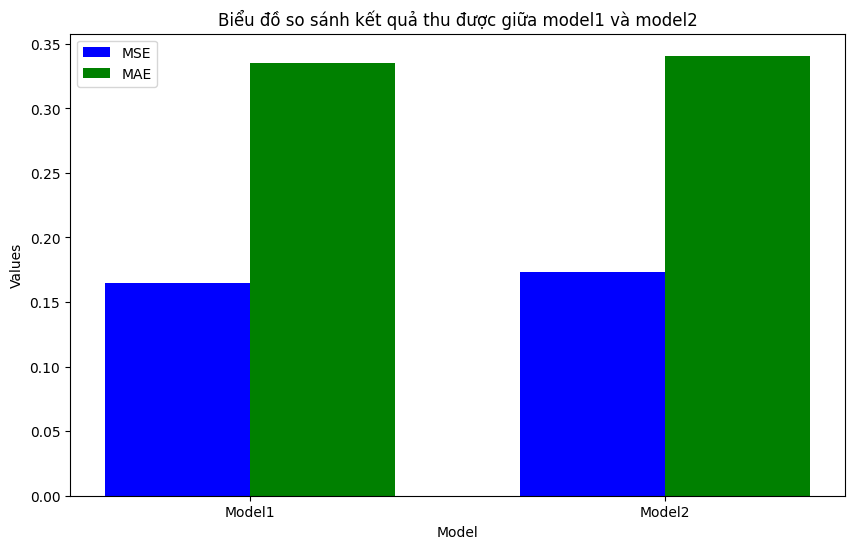

In [35]:
plt.figure(figsize=(10, 6)) 
plt.bar(index, evalution['MSE'], bar_width, color='blue', label='MSE')  
plt.bar(index + bar_width, evalution['MAE'], bar_width, color='green', label='MAE')  
plt.xlabel('Model')  
plt.ylabel('Values') 
plt.title('Biểu đồ so sánh kết quả thu được giữa model1 và model2')  
plt.xticks(index + bar_width / 2, evalution['Model'])  
plt.legend()  
plt.show()

$\text{Kết quả thu được ở model1 (với tỉ lệ train/test là 8:2) cho sai số ít hơn ở cả hai độ đo là MSE và MAE so với model 2 (với tỉ lệ train/test là 7:3).}$
$\text{Vì thế, model1 sẽ hiệu quả hơn trong việc huấn luyện mô hình}$

**18. Làm lại ý 12 áp dụng công thức sau:**
$$X_{std} = (X - Xmin)/ (Xmax - X.min)$$
$$X_{scaled} = X_{std} * (max - min) + min$$

In [36]:
def scale(X) :
    X_min = X.min()
    X_max = X.max()
    X_std = (X - X_min)/ (X_max - X_min)
    X_scaled = X_std*(X_max- X_min) + X_min
    return X_scaled

In [37]:
df_e = df.copy()
df_e
for _ in df.columns :
    if _ != 'Outcome':
        df_e[_] = scale(df_e[_])
df_e

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0,1.0


**19. Thực hiện lại ý 14 với dữ liệu ở ý 18**

In [38]:
target1 = df_e['Outcome']
feature1 = df_e.drop(columns =['Outcome'])

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(feature1,target1,test_size=0.2,random_state = 42)

In [40]:
model = train_model(X_train,Y_train)
pred = model.predict(X_test1)
pred

array([ 0.30490278,  0.21383957,  0.1347566 ,  0.20543465,  0.48334002,
        0.42997253, -0.22686234,  0.46241897,  0.54529996,  0.71072854,
        0.29242335,  0.87565906,  0.40332884,  0.32985909,  0.05988181,
        0.39254621,  0.12813766,  0.04727259,  0.68941027,  0.5791833 ,
        0.25271369,  0.05085641,  0.46771994,  0.09361782,  0.52570363,
        0.85478449,  0.14208106, -0.07981778,  0.28140336,  0.13349363,
        0.91088023,  0.81026646,  0.72949123,  0.6683414 ,  0.53649311,
        0.6362909 ,  1.03970846,  0.3043315 ,  0.49210876,  0.53452644,
        0.0383272 ,  0.55114439,  0.50759153,  0.35518671, -0.11422836,
        0.51257485,  0.54682905,  0.23357412,  0.38314368,  1.06050802,
       -0.03472588,  0.61839741,  0.73647153,  0.30697171,  0.18672017,
       -0.06623393,  0.72309949, -0.01930854,  0.4133868 ,  0.71063736,
        0.66740277,  0.36177246,  0.28382515,  0.25709394,  0.08558106,
        0.5912513 , -0.04515712,  0.65583544, -0.02062279,  0.65

**20. So sánh kết quả đạt được ở ý 19 và 14 bằng các biểu đồ trực quan, nhận xét kết quả này**

In [41]:
evalution_19 = []
evalution_19.append(mean_squared_error(pred,Y_test))
evalution_19.append(mean_absolute_error(pred, Y_test)) 

In [42]:
evalution = {
    'Model' : ['Model1', 'Model3'],
    'MSE' : [evalution_14[0], evalution_19[0]],
    'MAE' : [evalution_14[1], evalution_19[1]]
}

evalution = pd.DataFrame(evalution)
evalution

,Model,MSE,MAE
0,Model1,0.164943,0.335209
1,Model3,0.164943,0.335209


In [43]:
bar_width = 0.35
index = np.arange(len(evalution['Model']))

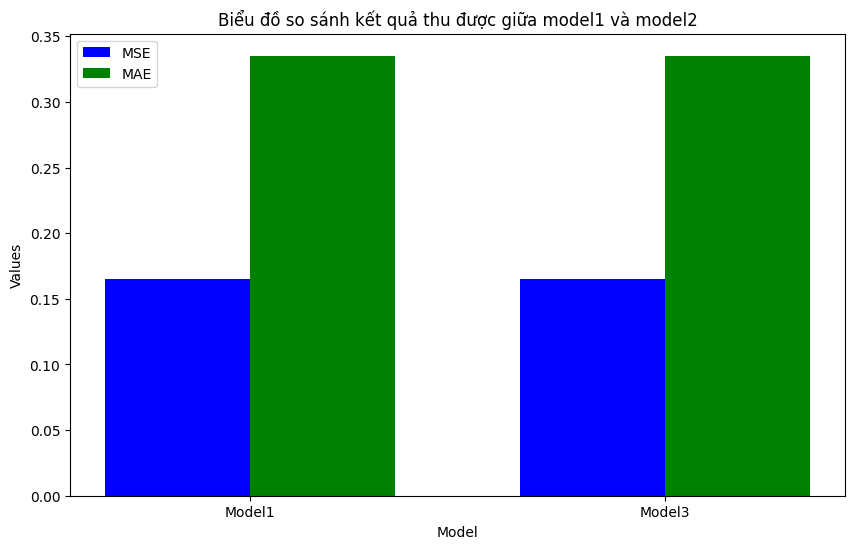

In [44]:
plt.figure(figsize=(10, 6)) 
plt.bar(index, evalution['MSE'], bar_width, color='blue', label='MSE')  
plt.bar(index + bar_width, evalution['MAE'], bar_width, color='green', label='MAE')  
plt.xlabel('Model')  
plt.ylabel('Values') 
plt.title('Biểu đồ so sánh kết quả thu được giữa model1 và model3')  
plt.xticks(index + bar_width / 2, evalution['Model'])  
plt.legend()  
plt.show()

$\Rightarrow \text{Hai model cho kết quả như nhau}$